In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #  for avoid unwanted warnings
sns.set()

In [2]:
# read csv file
data = pd.read_csv('Suicides in India 2001-2012.csv')

In [3]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [5]:
#Shape of Dataset
data.shape

(237519, 7)

In [6]:
data.isna().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [7]:
# How manny varaities are containts in perticular column
data.nunique()

State          38
Year           12
Type_code       5
Type           69
Gender          2
Age_group       6
Total        2180
dtype: int64

In [8]:
data['Type_code'].value_counts()

Causes                  109200
Means_adopted            67200
Professional_Profile     49263
Education_Status          7296
Social_Status             4560
Name: Type_code, dtype: int64

### Total Suicides in India

In [9]:
data['Total'].sum()

13071734

### Data Wrangling

 Rename State and Type like 'A & N Islands', 'A & N Islands (Ut)'
 Drop rows whose total is zero
 Drop rows where state is "Total %"

In [10]:
# replace all the states specified as Union Territories into normal states since that distinction does not matter to us here.

data.replace('A & N Islands (Ut)', 'A & N Islands', inplace = True)
data.replace('Chandigarh (Ut)', 'Chandigarh', inplace = True)
data.replace('D & N Haveli (Ut)', 'D & N Haveli', inplace = True)
data.replace('Daman & Diu (Ut)', 'Daman & Diu', inplace = True)
data.replace('Lakshadweep (Ut)', 'Lakshadweep', inplace = True)
data.replace('Delhi (Ut)', 'Delhi', inplace = True)

# replace 'Bankruptcy or Sudden change in Economic' to 'Bankruptcy or Sudden change in Economic Status' to ensure uniformity
# since both are the same but a few values have the prior and some the former.

data.replace('Bankruptcy or Sudden change in Economic', 'Bankruptcy or Sudden change in Economic Status', inplace = True)

# Here too we are trying to ensure uniformity by replacing the values properly

data.replace('Others (Please Specify)', 'By Other means', inplace = True)
data.replace('Not having Children(Barrenness/Impotency', 'Not having Children (Barrenness/Impotency)', inplace = True)

In [11]:
# Drop rows where total is zero.

data = data.drop(data[data.Total==0].index)

In [12]:
data= data.drop(data[(data.State == 'Total (Uts)') | (data.State == 'Total (All India)') | 
               (data.State == 'Total (States)')].index)

### Data exploration and visualization

C:\Users\Sangram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


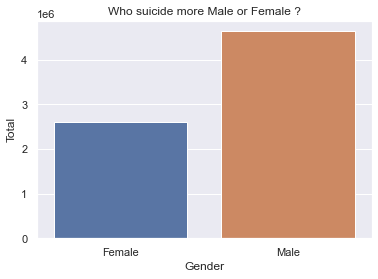

In [13]:
sns.barplot(data.groupby('Gender').sum()['Total'].index,data.groupby('Gender').sum()['Total'])
plt.title("Who suicide more Male or Female ?")
plt.show()

In [14]:
data_year_total = data.groupby(data["Year"]).agg({"Total":"sum"})
data_year_total.reset_index(inplace=True)

<AxesSubplot:title={'center':'Suicides in india \n Total Vs Year\n'}, xlabel='Year', ylabel='Total'>

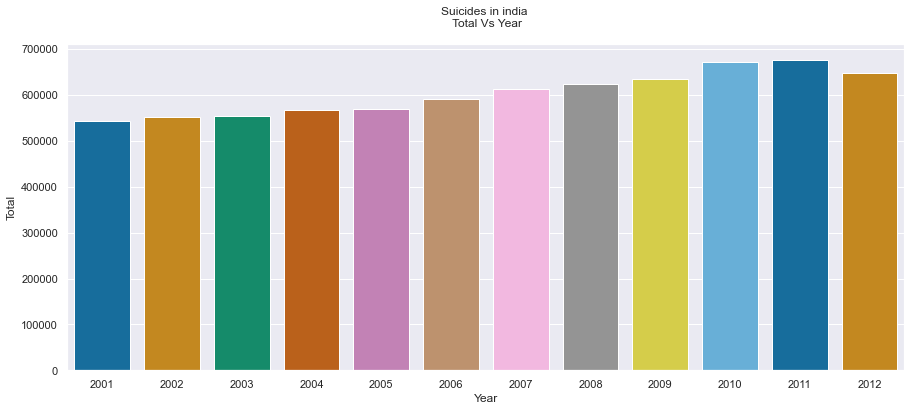

In [15]:
plt.figure(figsize=(15,6))
plt.title("Suicides in india \n Total Vs Year\n")
sns.barplot(x="Year" , y="Total" , data=data_year_total , palette="colorblind" )

In [16]:
data.Age_group.value_counts()

15-29     24960
30-44     24064
45-59     19730
60+       13766
0-14       9639
0-100+     8951
Name: Age_group, dtype: int64

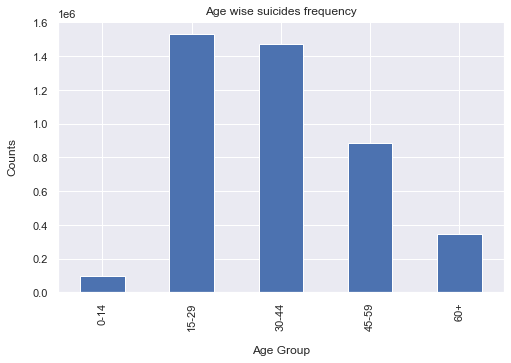

In [17]:
# Age Suicide Frequency
df_Age = data[data['Age_group']!='0-100+']

age = df_Age.groupby('Age_group').sum()['Total'].plot(kind="bar",figsize=(8,5), title ="Age wise suicides frequency");
age.set_xlabel('\nAge Group')
age.set_ylabel('Counts\n')
sns.set_style('whitegrid')
sns.set_palette('Set2');

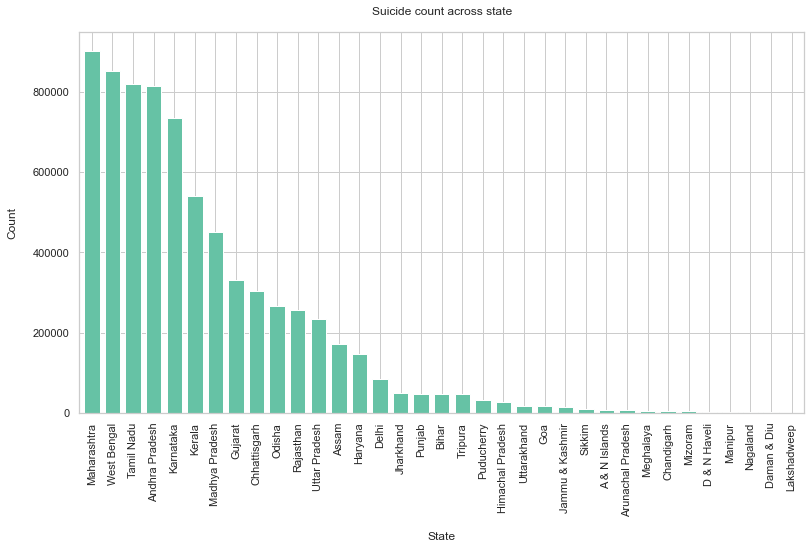

In [18]:
# State wise Suicide count

state = data.groupby('State').sum()['Total']
sort_state = state.sort_values(ascending = False)
state_fig = sort_state.plot(kind='bar', figsize = (13,7), title = 'Suicide count across state\n', width = 0.75)
state_fig.set_xlabel('\nState')
state_fig.set_ylabel('Count\n')
sns.set_style('whitegrid')
sns.set_palette('Set2');

In [19]:
data.groupby('State').Total.sum()

State
A & N Islands          8109
Andhra Pradesh       814059
Arunachal Pradesh      6633
Assam                172276
Bihar                 46214
Chandigarh             5164
Chhattisgarh         302354
D & N Haveli           3430
Daman & Diu            1391
Delhi                 84272
Goa                   17363
Gujarat              330858
Haryana              147176
Himachal Pradesh      26562
Jammu & Kashmir       14821
Jharkhand             49720
Karnataka            734825
Kerala               538946
Lakshadweep              50
Madhya Pradesh       451535
Maharashtra          901945
Manipur                2102
Meghalaya              5415
Mizoram                4154
Nagaland               1728
Odisha               267234
Puducherry            32144
Punjab                46350
Rajasthan            255134
Sikkim                 9606
Tamil Nadu           818691
Tripura               45965
Uttar Pradesh        233352
Uttarakhand           18496
West Bengal          849936
Name: Total, d

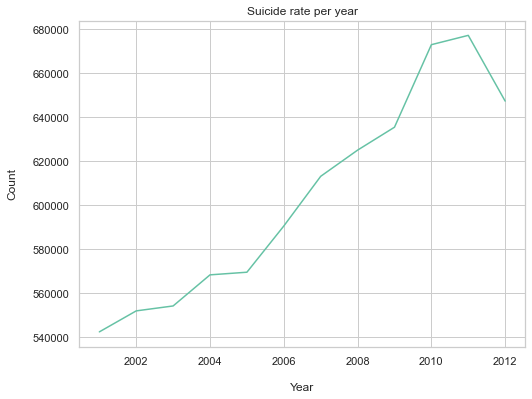

In [20]:
year = data.groupby('Year').sum()['Total'].plot(kind='line', figsize=(8,6), title = 'Suicide rate per year');
year.set_xlabel('\nYear')
year.set_ylabel('Count\n')
sns.set_style('whitegrid');

In [21]:
# split df ny it's type code

cause = data[data['Type_code'] == 'Causes']
edu_status = data[data['Type_code'] == 'Education_Status']
means_adpt = data[data['Type_code'] == 'Means_adopted']
prof = data[data['Type_code'] == 'Professional_Profile']
soc_status = data[data['Type_code'] == 'Social_Status']

In [22]:
# function to plot

def plot_type(data, Title, X_lab):
    p_type = data.groupby('Type').sum()['Total']
    sort_df = p_type.sort_values(ascending = False)

    fig = sort_df.plot(kind='bar', figsize = (12,6), title = Title + '\n', width = 0.8)
    fig.set_xlabel('\n' + X_lab )
    fig.set_ylabel('Count\n')
    sns.set_style('whitegrid')
    sns.set_palette('Set2');   

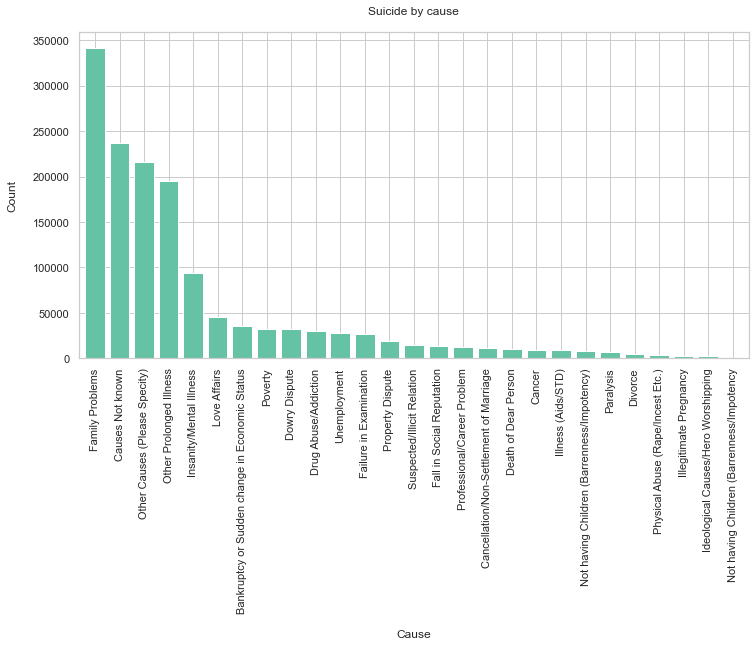

In [23]:
# plot by cause
plot_type(cause, 'Suicide by cause', 'Cause')

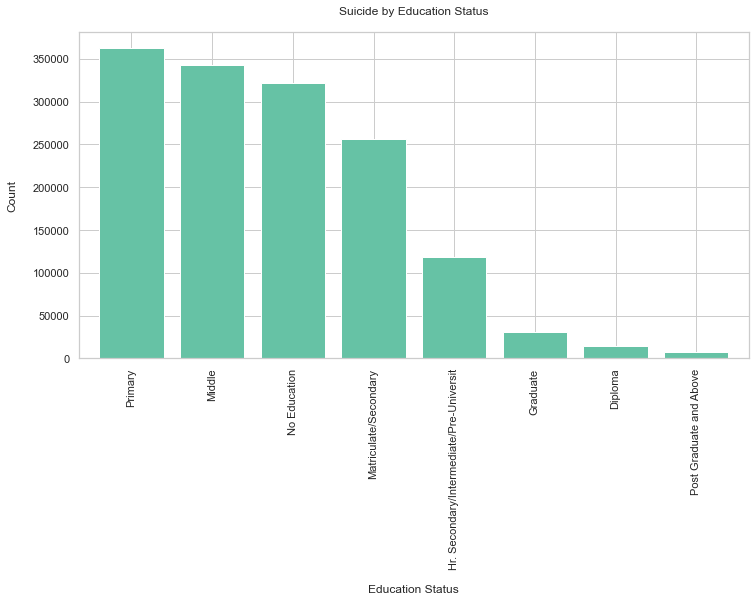

In [24]:
# plot by education status
plot_type(edu_status, 'Suicide by Education Status', 'Education Status')

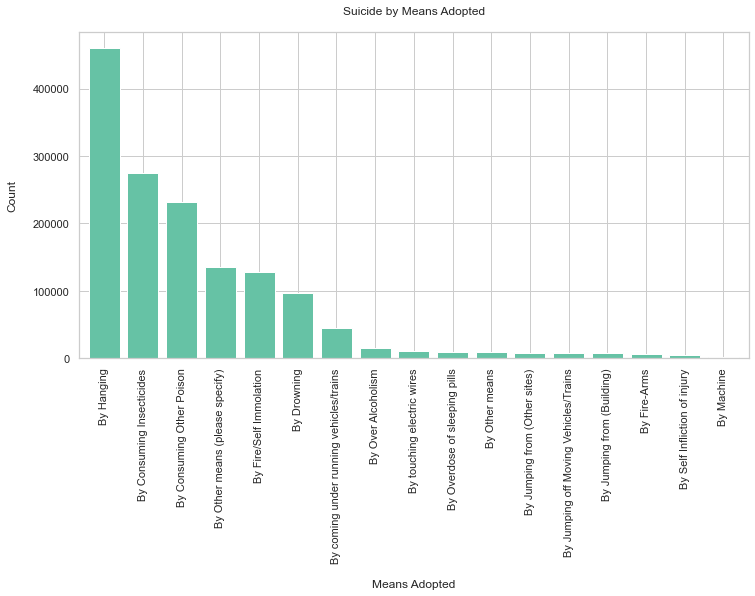

In [25]:
# plot by means adopted
plot_type(means_adpt, 'Suicide by Means Adopted', 'Means Adopted')

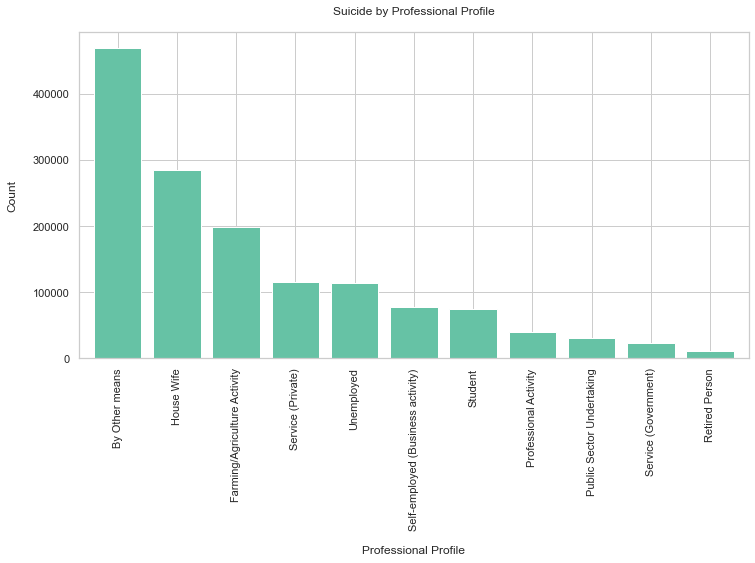

In [26]:
# suicide by professional profile
plot_type(prof, 'Suicide by Professional Profile', 'Professional Profile')

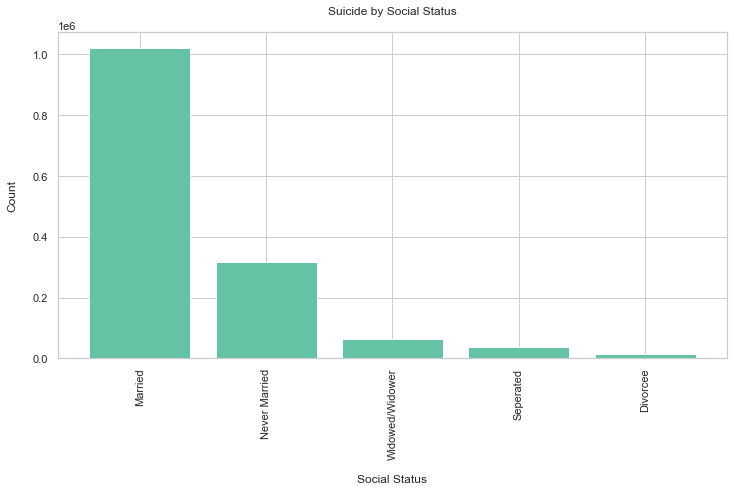

In [27]:
# suicide by social Status
plot_type(soc_status, 'Suicide by Social Status', 'Social Status',)

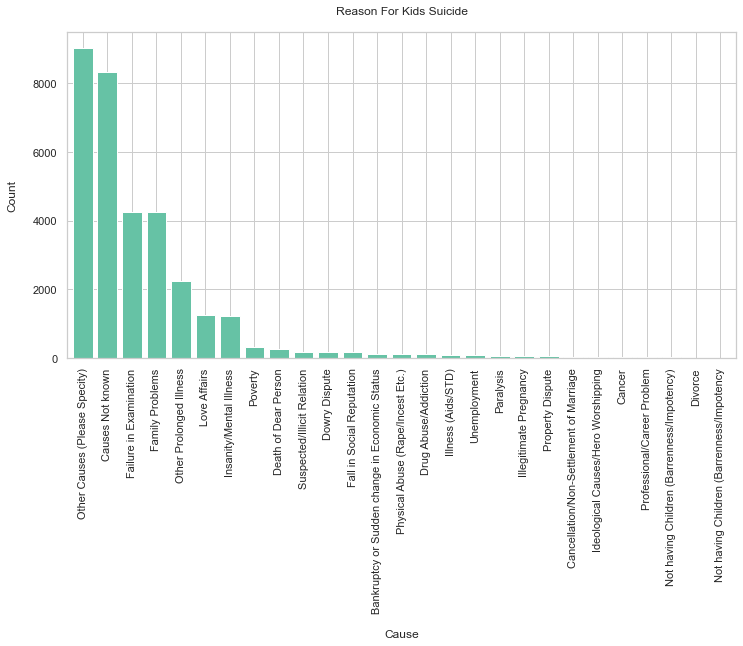

In [28]:
age_lower = data[data['Age_group']== '0-14']
age_lower_cause = age_lower[age_lower['Type_code'] == 'Causes']
plot_type(age_lower_cause, 'Reason For Kids Suicide', 'Cause')

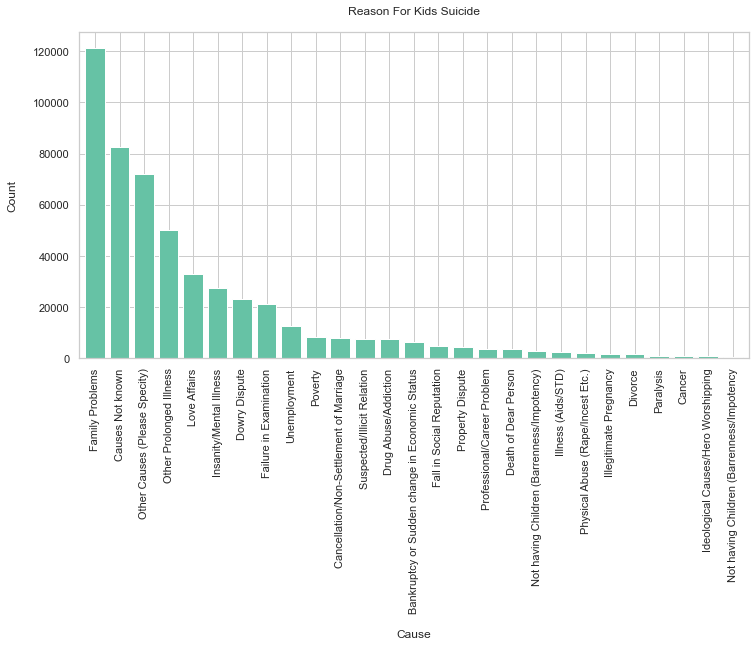

In [29]:
age_middle = data[data['Age_group']== '15-29']
age_middle_cause = age_middle[age_middle['Type_code'] == 'Causes']
plot_type(age_middle_cause, 'Reason For Kids Suicide', 'Cause')

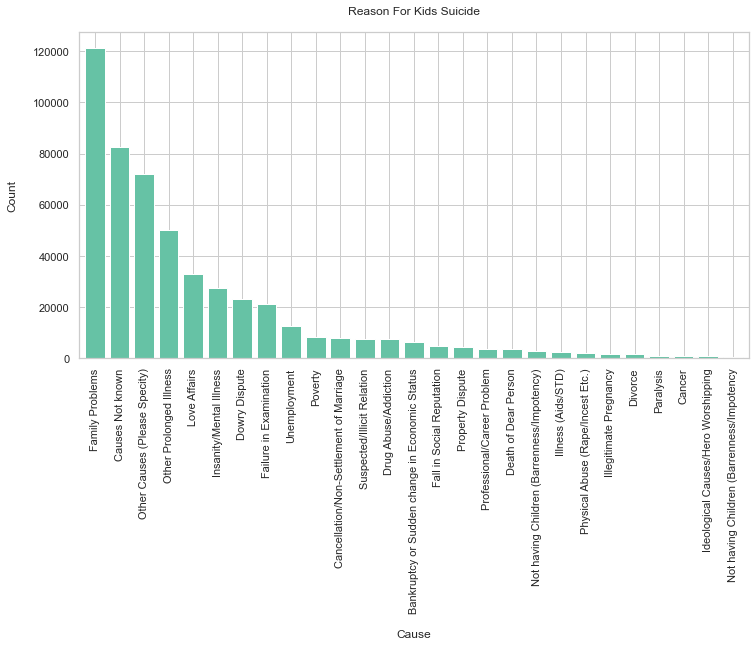

In [30]:
age_middle = data[data['Age_group']== '15-29']
age_middle_cause = age_middle[age_middle['Type_code'] == 'Causes']
plot_type(age_middle_cause, 'Reason For Kids Suicide', 'Cause')

### Conclusion :

1. Age group between 15-44 has the highest number of suicides. 

2. Rate of suicide sky rocketed from 2002-2010 but since 2011 it has been decreasing but, since we have the data till 2012 we can't confim the pattern. 

3. Maharashtra, West Bengal and Tamil Nadu have the highest suicide rate this might also be because of the high population in these states.    

4. Family Problems, Illness, Mental Illness are some of the main reason while most of the reasons are still unknown.        
5. Hanging, Consuming Insecticides is more common but, most of other means are unknown.       

6. Most of the professional profile is unknown but house wife comes in second, while Farming comes in at third.  

7. Married is at the top when it comes to social status while never married is at second.   

8. The reason for suicide at the age group between 0-14 is because of Failure in Examination. 

9. The reason for suicide at the age group between 15-29 is because of Family Problems.      

### People who commit suicide are mostly:

Married

Farmers and housewives

Youngsters (15-29 age) and middle age (30-44)